In [ ]:
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found [here](https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings).

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

***This is a test.***

In [9]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


<Axes: xlabel='institution_name', ylabel='count'>

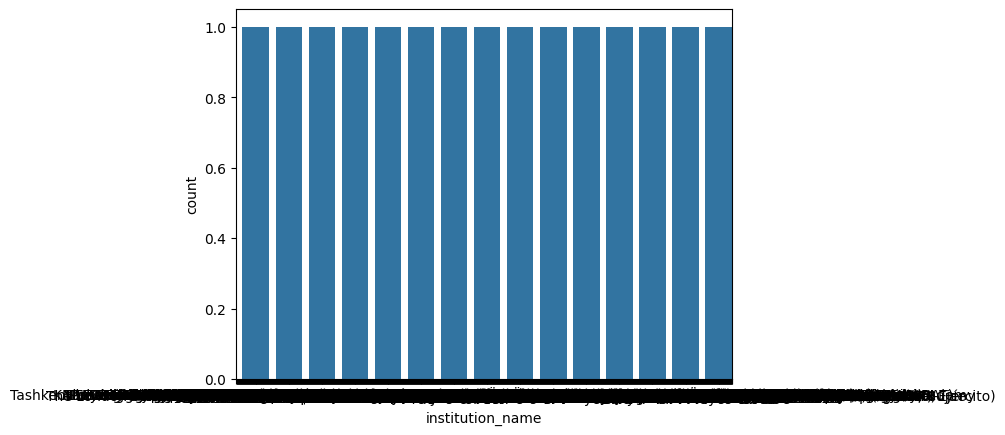

In [10]:
sns.countplot(data=df, x='institution_name')